In [1]:
from matplotlib import pyplot as plt
import numpy as np
from iminuit import Minuit
from iminuit.cost import LeastSquares
import math

In [2]:
evt_x = np.loadtxt("data/fit-data-4.txt")

In [3]:
evt_x.max()

np.float64(199.668612137749)

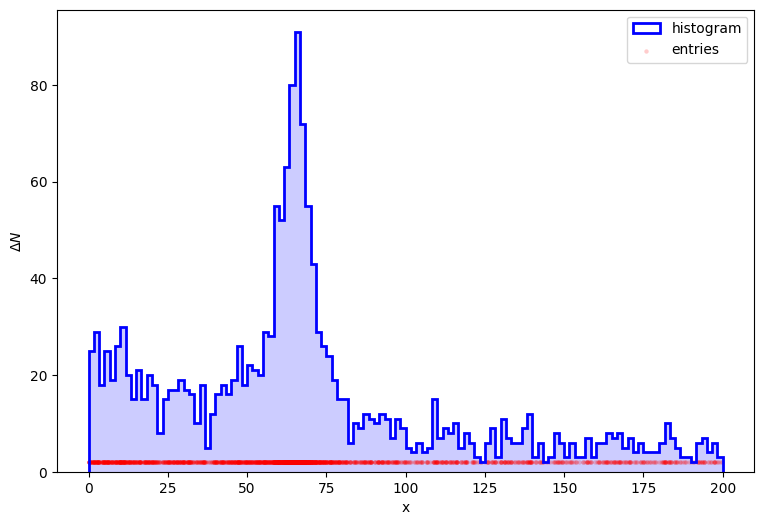

In [4]:
fig, ax = plt.subplots(figsize=(9, 6))
n_bins = 120
x_range = (0, 200)
data_y, bins, patches = ax.hist(evt_x, n_bins, range=x_range, density=False, 
    histtype=u'step', edgecolor='b', linewidth=2, label='histogram')
ax.hist(evt_x, n_bins, range=x_range, density=False, color='b', alpha=0.2)
ax.scatter(evt_x, np.full_like(evt_x, 2), marker='o', color='r', s=10, alpha=0.2, linewidth=0, label='entries')
plt.xlabel('x')
plt.ylabel('$\Delta N$')
plt.legend()
plt.show()

In [5]:
#bins

In [6]:
data_x = (bins+(bins[1] - bins[0])/2)[:-1]
#print(data_x)
#print

In [7]:
data_yerr = np.sqrt(data_y)
#print(data_y)
#print(data_yerr)

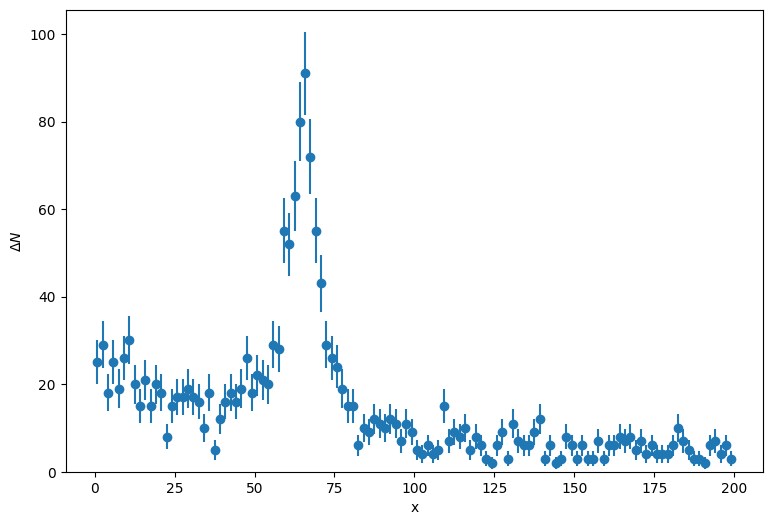

In [8]:
plt.figure(figsize=(9,6),dpi=100)
plt.errorbar(data_x, data_y, data_yerr, fmt="o")
plt.xlabel('x')
plt.ylabel('$\Delta N$')
plt.ylim(0)
plt.show()

In [9]:
def bkg_pdf(x, l):
    return np.exp(-x/l)/l
def sig_pdf(x, mu, sigma):
    return np.exp(-((x - mu)/sigma)**2/2)/math.sqrt(2*math.pi*sigma**2)
def bkg_model(x, b, c, l):
    return b*bkg_pdf(x, l) + c
def sig_model_1(x, s, mu, sigma):
    return s*sig_pdf(x, mu, sigma)
def fit_model_1(x, b, c, l, s, mu, sigma):
    return bkg_model(x, b, c, l) + sig_model_1(x, s, mu, sigma)

In [10]:
least_squares_mode = LeastSquares(data_x[data_y>0], data_y[data_y>0], data_yerr[data_y>0], fit_model_1)
m0 = Minuit(least_squares_mode,  250, 40 ,10, 100, 60, 1, name=("B", "C", "$\lambda$", "S", "$\mu$", "$\sigma$"))
m0.limits["$\sigma$"] = (0, 100)
m0.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 148.5 (χ²/ndof = 1.3)      │              Nfcn = 349              │
│ EDM = 0.000146 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ B    │  1.16e3   │  0.21e3   │            │            │         │         │       │
│ 1 │ C    │    3.3    │    0.8    │            │            │         │         │       │
│ 2 │ 𝜆    │    59     │    11     │            │            │         │         │       │
│ 3 │ S    │    920    │    50     │            │            │         │         │       │
│ 4 │ 𝜇    │   65.10   │   0.32    │            │            │         │         │       │
│ 5 │ 𝜎    │    5.8    │    0.4    │            │            │    0    │   100   │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────────────────────────────────────────┐
│   │        B        C        𝜆        S        𝜇        𝜎 │
├───┼───────────────────────────────────────────────────────┤
│ B │ 4.44e+04   -160.8   2.19e3   -4.0e3     1.69   -29.99 │
│ C │   -160.8    0.653     -8.3     12.0    -0.00     0.09 │
│ 𝜆 │   2.19e3     -8.3      125  -0.19e3     0.02    -1.44 │
│ S │   -4.0e3     12.0  -0.19e3 2.53e+03    -0.67     7.82 │
│ 𝜇 │     1.69    -0.00     0.02    -0.67    0.101    -0.01 │
│ 𝜎 │   -29.99     0.09    -1.44     7.82    -0.01    0.162 │
└───┴───────────────────────────────────────────────────────┘

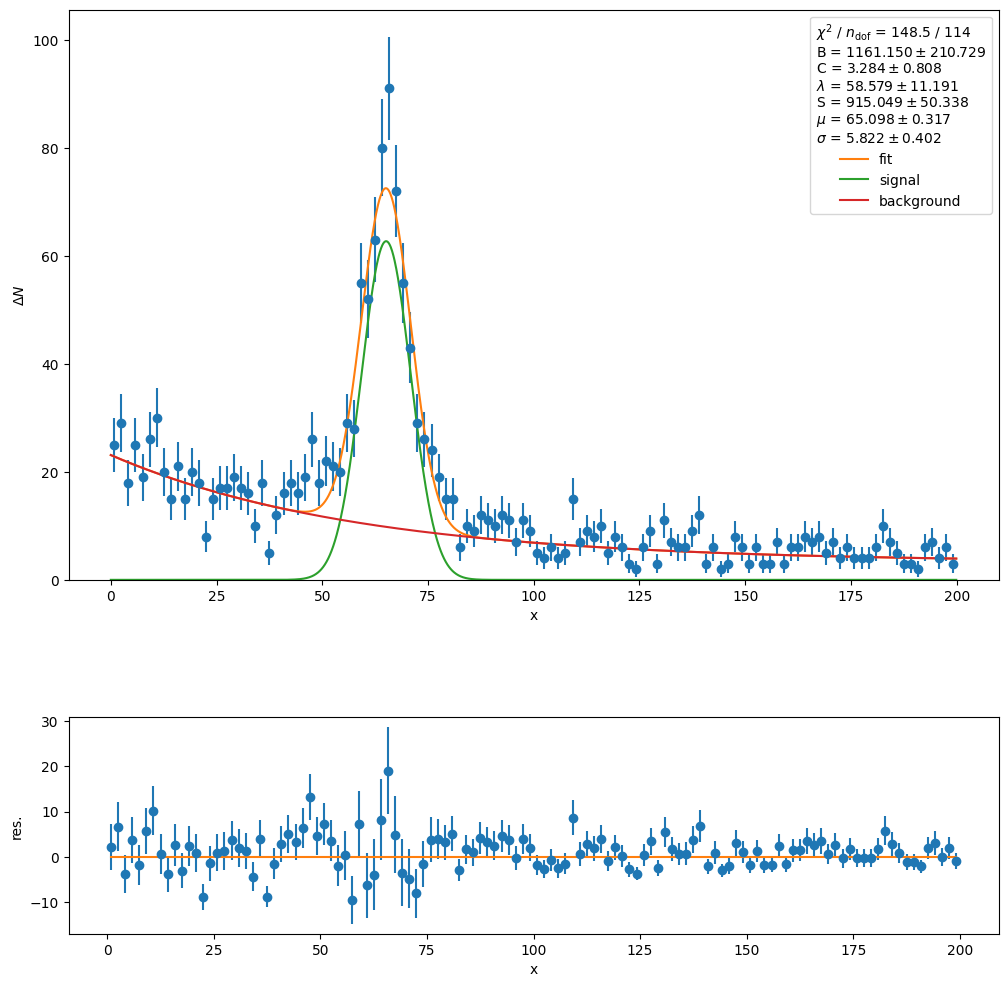

In [11]:
import matplotlib.gridspec as gridspec
data_x_f = np.arange(0, bins[-1], 0.1)
b, c, l, s, mu, sigma = m0.values
data_y_f = fit_model_1(data_x_f, *m0.values)
bkg_y_f = bkg_model(data_x_f, b, c, l)
sig_y_f = sig_model_1(data_x_f, s, mu, sigma)

plt.figure(figsize=(12,12),dpi=100)
gs = gridspec.GridSpec(8, 1)
ax0 = plt.subplot(gs[:5, :])
ax1 = plt.subplot(gs[6:, :])
ax0.errorbar(data_x, data_y, data_yerr, fmt="o")
ax0.plot(data_x_f, data_y_f, label="fit")
ax0.plot(data_x_f, sig_y_f, label="signal")
ax0.plot(data_x_f, bkg_y_f, label="background")
ax0.set_xlabel('x')
ax0.set_ylabel('$\Delta N$')
ax1.errorbar(data_x, data_y-fit_model_1(data_x, *m0.values), data_yerr, fmt="o")
ax1.plot([data_x[0],data_x[-1]], [0,0])
ax1.set_xlabel('x')
ax1.set_ylabel('res.')
ax0.set_ylim(0)
fit_info = [ f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {m0.fval:.1f} / {len(data_x) - m0.nfit}" ]
for p, v, e in zip(m0.parameters, m0.values, m0.errors):
    fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")
ax0.legend(title="\n".join(fit_info))
plt.show()

In [12]:
def sig_model(x, s1, s2, mu, sigma1, sigma2):
    return s1*sig_pdf(x, mu, sigma1) + s2*sig_pdf(x, mu, sigma2)
def fit_model(x, b, c, l, s1, s2, mu, sigma1, sigma2):
    return bkg_model(x, b, c, l) + sig_model(x, s1, s2, mu, sigma1, sigma2)

In [13]:
least_squares_mode = LeastSquares(data_x[data_y>0], data_y[data_y>0], data_yerr[data_y>0], fit_model)
m = Minuit(least_squares_mode,  250, 40 ,10, 100, 60, 60, 0.5, 2.5, name=("B", "C", "$\lambda$", "S1", "S2", "$\mu$", "$\sigma_1$","$\sigma_2$"))
m.limits["$\sigma_1$"] = (0, 10)
m.limits["$\sigma_2$"] = (0, 100)

In [14]:
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 129.9 (χ²/ndof = 1.2)      │              Nfcn = 939              │
│ EDM = 5.82e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ B    │  0.79e3   │  0.18e3   │            │            │         │         │       │
│ 1 │ C    │    4.3    │    0.5    │            │            │         │         │       │
│ 2 │ 𝜆    │    38     │    11     │            │            │         │         │       │
│ 3 │ S1   │  0.53e3   │  0.15e3   │            │            │         │         │       │
│ 4 │ S2   │  0.56e3   │  0.12e3   │            │            │         │         │       │
│ 5 │ 𝜇    │   65.05   │   0.30    │            │            │         │         │       │
│ 6 │ 𝜎₁   │    3.8    │    0.7    │            │            │    0    │   10    │       │
│ 7 │ 𝜎₂   │   11.5    │    3.0    │            │            │    0    │   100   │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬─────────────────────────────────────────────────────────────────────────┐
│    │        B        C        𝜆       S1       S2        𝜇       𝜎₁       𝜎₂ │
├────┼─────────────────────────────────────────────────────────────────────────┤
│  B │ 3.29e+04   -85.46   1.95e3 -0.014e6        0     2.36    -52.9     -377 │
│  C │   -85.46    0.299    -5.23    28.99     0.51    -0.01     0.11     0.81 │
│  𝜆 │   1.95e3    -5.23      128  -0.83e3        0     0.10     -3.2      -23 │
│ S1 │ -0.014e6    28.99  -0.83e3 2.22e+04 -0.014e6     2.55     89.6      388 │
│ S2 │        0     0.51        0 -0.014e6 1.44e+04    -3.31    -61.3     -188 │
│  𝜇 │     2.36    -0.01     0.10     2.55    -3.31   0.0929     0.00     0.03 │
│ 𝜎₁ │    -52.9     0.11     -3.2     89.6    -61.3     0.00    0.467      1.5 │
│ 𝜎₂ │     -377     0.81      -23      388     -188     0.03      1.5     8.82 │
└────┴─────────────────────────────────────────────────────────────────────────┘

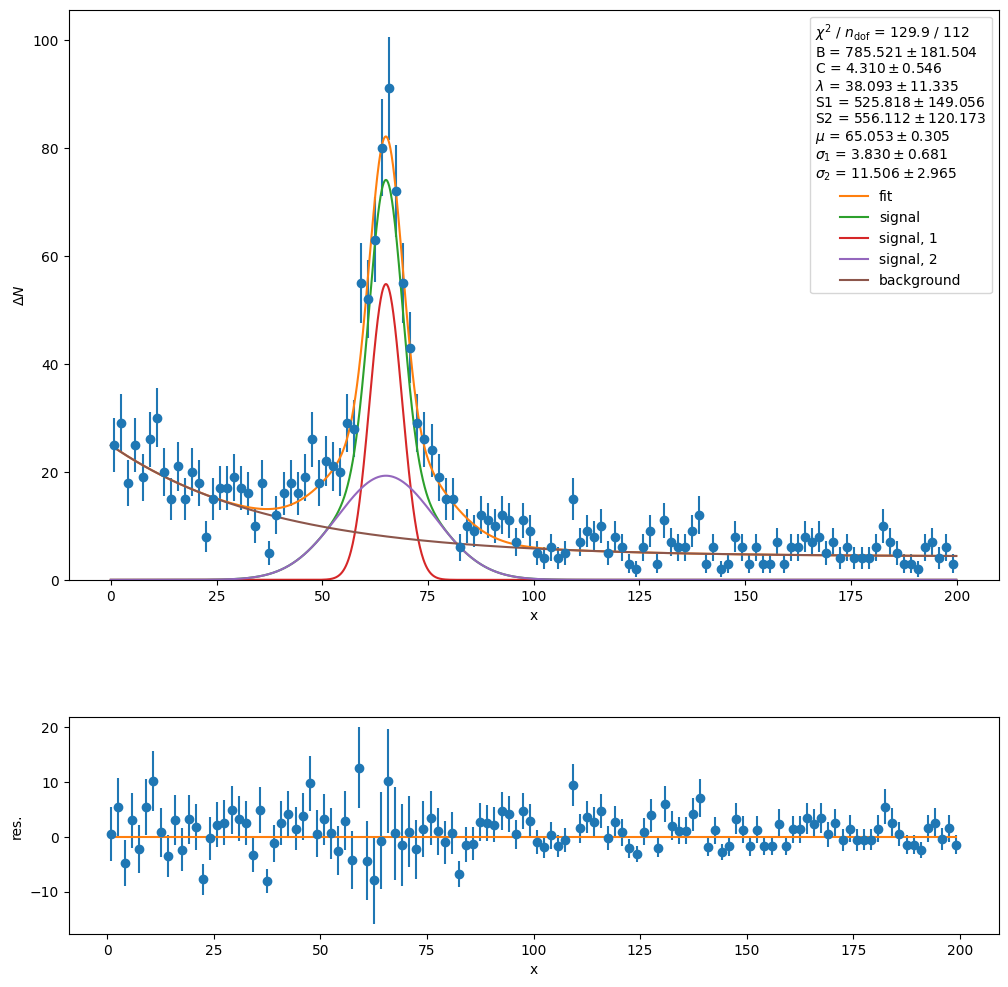

In [15]:
import matplotlib.gridspec as gridspec
data_x_f = np.arange(0, bins[-1], 0.1)
b, c, l, s1, s2, mu, sigma1, sigma2 = m.values
data_y_f = fit_model(data_x_f, *m.values)
bkg_y_f = bkg_model(data_x_f, b, c, l)
sig_y_f = sig_model(data_x_f, s1, s2, mu, sigma1, sigma2)
sig_y_f1 = sig_model_1(data_x_f, s1, mu, sigma1)
sig_y_f2 = sig_model_1(data_x_f, s2, mu, sigma2)

plt.figure(figsize=(12,12),dpi=100)
gs = gridspec.GridSpec(8, 1)
ax0 = plt.subplot(gs[:5, :])
ax1 = plt.subplot(gs[6:, :])
ax0.errorbar(data_x, data_y, data_yerr, fmt="o")
ax0.plot(data_x_f, data_y_f, label="fit")
ax0.plot(data_x_f, sig_y_f, label="signal")
ax0.plot(data_x_f, sig_y_f1, label="signal, 1")
ax0.plot(data_x_f, sig_y_f2, label="signal, 2")
ax0.plot(data_x_f, bkg_y_f, label="background")
ax0.set_xlabel('x')
ax0.set_ylabel('$\Delta N$')
ax1.errorbar(data_x, data_y-fit_model(data_x, *m.values), data_yerr, fmt="o")
ax1.plot([data_x[0],data_x[-1]], [0,0])
ax1.set_xlabel('x')
ax1.set_ylabel('res.')
ax0.set_ylim(0)
fit_info = [ f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {m.fval:.1f} / {len(data_x) - m.nfit}" ]
for p, v, e in zip(m.parameters, m.values, m.errors):
    fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")
ax0.legend(title="\n".join(fit_info))
plt.show()
plt.show()
plt.show()